In [9]:
import quimb as qu
import numpy as np
import matplotlib.pyplot as plt

In [17]:
L=int(input('Enter No. of Particles:'))
H = qu.ham_heis(L,sparse=True,cyclic=False)
print('Hamiltonian:\n',H)

Enter No. of Particles:3
Hamiltonian:
   (0, 0)	0.5
  (1, 2)	0.5
  (2, 1)	0.5
  (2, 2)	-0.5
  (2, 4)	0.5
  (3, 5)	0.5
  (4, 2)	0.5
  (5, 3)	0.5
  (5, 5)	-0.5
  (5, 6)	0.5
  (6, 5)	0.5
  (7, 7)	0.5


In [18]:
u=qu.up(sparse=True)
d=qu.down(sparse=True)    

In [19]:
r=np.array([1])
S_i=qu.qu(r,qtype='ket',sparse=True)
for l in range(L):
    if l%2==0:
        S_i=qu.kron(S_i,u)
    else:
        S_i=qu.kron(S_i,d)
  
print('Initial State:\n',S_i)

Initial State:
   (2, 0)	(1+0j)


In [20]:
GS=qu.qu(qu.groundstate(H),sparse=True)

In [21]:
print('Ground State:\n',GS)

Ground State:
   (1, 0)	(0.40824829046386296+0j)
  (2, 0)	(-0.8164965809277258+0j)
  (4, 0)	(0.4082482904638631+0j)


In [22]:
Sz0=qu.ikron(qu.spin_operator('z'),[2]*L , inds=[0])
el=list()
evo=qu.Evolution(S_i,H)
for pt in evo.at_times(np.arange(0,10,0.1)):
    e=qu.expec(pt,Sz0)
    el.append(e)

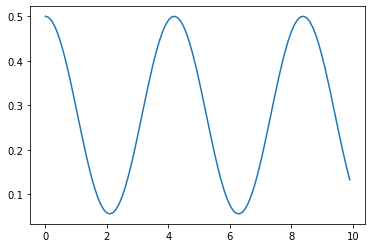

In [23]:
plt.plot(np.arange(0,10,0.1),el)
